the purpose of this notebook is to project gene essentiality profiles into 2D space using PCA and NMF (non-negative matrix factorization). 

Adrian Jinich 
04/01/2019

In [108]:
import numpy as np
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load dataset for log2FC

In [139]:
data_path = '../../data/Tn_library_log2FC_DASH.xlsx'
df_log2FC = pd.read_excel(data_path)
df_log2FC.shape

(3990, 39)

- get rid of +/- infinities
- make nan's zeros for now: 

In [142]:
df_log2FC.replace([np.inf, -np.inf], np.nan, inplace=True)
df_log2FC.fillna(0, inplace=True)

In [144]:
data_cols = df_log2FC.columns[2:]
mat_log2FC = df_log2FC[data_cols].values

PCA plot: 

In [145]:
pca = decomposition.PCA(n_components=4)

In [146]:
pc = pca.fit_transform(mat_log2FC)

variance explained by each principal component

In [147]:
pca.explained_variance_ratio_

array([0.22075733, 0.11677971, 0.07424446, 0.06573041])

In [148]:
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2', 'PC3', 'PC4'])

Scatter plot of two principal components

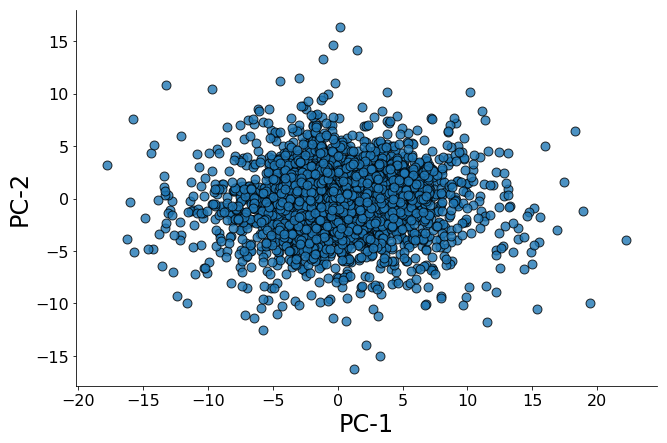

In [153]:
sns.lmplot( x="PC1", y="PC2",data=pc_df, fit_reg=False, scatter_kws={"s": 80, 'edgecolor':'k'}, height=6, aspect=1.5) # specify the point size
xl = plt.xlabel('PC-1', fontsize = 24)
yl = plt.ylabel('PC-2', fontsize = 24)
xt = plt.xticks(fontsize=16)
yt = plt.yticks(fontsize=16)
plt.tight_layout
fig_path = '../../figures/genome_visualizations/pca_1.png'
plt.savefig(fig_path, dpi = 300)